<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/cha3_p112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# 3. 사드 배치의 영향으로 중국인 관광객이 얼마나 줄었을까?

**데이터 불러오기 및 전처리**

In [109]:
# 불러올 데이터의 형태 파악
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
kto_201901=pd.read_excel('/content/kto_201901.xlsx',header=1, usecols='A:G', skipfooter=4)
kto_201901

# header=1 : 국적/관광/상용/공용/유학,연수/기타 관련 내용 출력
# usecols='A:G'국적 ~ 계까지의 값 출력
# skipfooter=4 : 계, 전년동기, 성장률, 구성비 생략

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [111]:
# tail() 함수 활용
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


**데이터 전처리**

In [112]:
# 데이터 전처리(Data Preprocessing): "분석에 적합하도록"이라는 표현에는 어디서나 통용되는 공통적인 프로세스가 있지는 않지만,
# 여기에는 데이터 변수별로 값에 이상이 없는지 확인, 결측값 처리, 이상치 처리, 변수 정규화, 파생 변수 생성 등의 과정이 포함됩니다.

# 이러한 데이터 전처리는 분석하려는 데이터에 대한 이해가 선행됐을 대, 그 기준을 정하기가 수월하기 때문에 해당 데이터 분야에 대한
# 도메인 지식이 필요합니다.

**데이터 탐색**

In [113]:
kto_201901.info()

# <class 'pandas.core.frame.DataFrame'>: 데이터는 pandas의 데이터프레임 클래스로 구성.
# dtypes: int64(6), object(1): 1개의 문자형 변수(국적)와 6개의 정수형 변수(관광,상용, 공용, 유학/연수, 기타, 계)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [114]:
# describe()함수 활용: 정수형 변수의 특징
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [115]:
# 각 칼럼에서 0인 부분을 필터링
condition=(kto_201901['관광']==0) | (kto_201901['상용']==0) |(kto_201901['공용']==0) | (kto_201901['유학/연수']==0)
kto_201901[condition]

# |(or) 조건을 이용해 4가지 목적 중 한 가지라도 입국객수가 0인 국적으로 필터링.

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [116]:
# 데이터프레임에 기준년월 추가
kto_201901['기준년월']='2019-01'
kto_201901.head()

# 2010년 1월부터 2019년 8월 데이터를 활용할 예정이기 때문에, 각 데이터마다 기준년월 정보가 필요합니다.

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01


In [117]:
# 국적 데이터만 남기기
kto_201901['국적'].unique()

# .unique()함수: 칼럼 내 중복을 제거한 값들을 보여주는 함수.
# 하나의 칼럼에는 하나의 특징을 가진 값들이 들어있어어야 데이터 분석에 활용하기 용이합니다.
# 국적 칼럼에는 '아시아주','일본','대만',...과 같이 대륙과 국가가 혼용된 것을 확인할 수 있습니다.

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [118]:
# 대륙 목록 만들기
continents_list=['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [119]:
# 대륙목록에 해당하는 값 제외
condition=(kto_201901.국적.isin(continents_list)==False)
kto_201901_country=kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [120]:
# kto_201901_country 데이터를 head()함수로 확인
kto_201901_country.head()

# kto_201901_country 데이터에서는 1번부터 시작합니다. 그 이유는 kto_201901_country 데이터가 kto_201901에서
# 필터링한 결과를 저장한 데이터이기 때문입니다.-> kto_201901_country의 인덱스 값에는 기존 데이터에서
# 대륙에 해당하는 값이 누락돼 있습니다.

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01


In [121]:
# 인덱스 재설정: 데이터 필터링하다 보면, 인덱스 값이 누락되는 경우가 발생하는 데,
# 이런 경우에는 인덱스 값을 초기화하는 것이 좋습니다.

kto_201901_country_newindex=kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex.head()

# 첫번재 로우의 인덱스 값이 0부터 시작하는 것을 확인할 수 있습니다.
# reset_index() 함수를 사용하면 인덱스 값을 0부터 순차적으로 다시 초기화합니다.

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [122]:
# 대륙 칼럼 만들기
# 지금까지의 작업을 통해 국적 칼럼에 국가명만 남겨놓았으니 각 국가들이 어떤 대륙에 속하는지에 대한
# 정보도 가지고 있으면 데이터 분석에 도움이 될 것이다.

# 대륙 칼럼값 만들기
continents=['아시아']*25+['아메리카']*5+['유럽']*23+['오세아니아']*3\
+['아프리카']*2+['기타대륙']+['교포']
print('continents값:',continents)

continents값: ['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


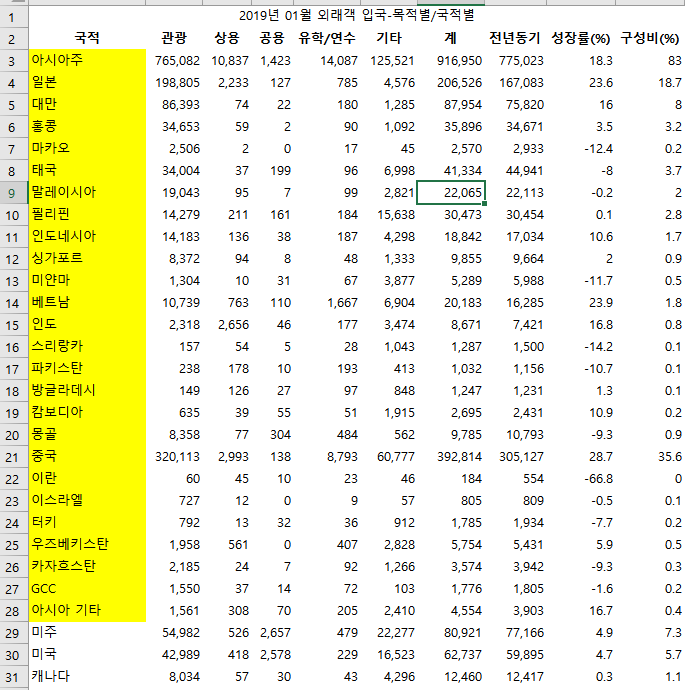

In [123]:
# 대륙 칼럼 추가
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,일본,198805,2233,127,785,4576,206526,2019-01
1,대만,86393,74,22,180,1285,87954,2019-01
2,홍콩,34653,59,2,90,1092,35896,2019-01
3,마카오,2506,2,0,17,45,2570,2019-01
4,태국,34004,37,199,96,6998,41334,2019-01


In [124]:
# 대륙 칼럼 생성
kto_201901_country_newindex['대륙']=continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [125]:
kto_201901_country_newindex.tail()
# tail을 통해 결과값을 보면, 대륙: 교포(1), 기타대륙(1), 아프리카(2), 오세아니아(3) 등을 확인할 수 잇다.

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타대륙
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [126]:
# 국적별 관광객 비율 살펴보기
kto_201901_country_newindex['관광객비율(%)']=round(kto_201901_country_newindex['관광']/kto_201901_country_newindex['계']*100,1)
kto_201901_country_newindex

# 관광객 비율을 추가해서 생성한 다음, 관광객으로 들어온 사람/총합을 통해 몇%인지 구한다.
# 관광객 비율: (관광객수/전체 입국객 수)*100

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7


In [127]:
# 관광객비율(%) 칼럼으로 내림차순 정렬
kto_201901_country_newindex.sort_values(by='관광객비율(%)',ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [128]:
# 관광객비율(%) 칼럼으로 오름차순 정렬
kto_201901_country_newindex.sort_values(by='관광객비율(%)',ascending=True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6


In [129]:
# pivot_table() 함수 활용
kto_201901_country_newindex.pivot_table(values='관광객비율(%)',index='대륙',aggfunc='mean') # 대륙별로 관광객 비율의 평균


,관광객비율(%)
대륙,
교포,0.000000
기타대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [130]:
# 중국 국적만 필터링
condition=(kto_201901_country_newindex.국적=='중국')
kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [131]:
# 기준년월별로 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기
tourist_sum=sum(kto_201901_country_newindex['관광'])
tourist_sum # 2019년 1월에 한국을 방문한 총 외국인 관광객수: 884,293명

884293

In [132]:
# 전체 비율 칼럼 생성
kto_201901_country_newindex['전체비율(%)']=round(kto_201901_country_newindex['관광']/tourist_sum*100,1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [133]:
# 전체비율(%) 칼럼 기준으로 내림차순 정렬
kto_201901_country_newindex.sort_values('전체비율(%)',ascending=False).head()

# 중국: 36.2%: 전체 외국인 관광객 중 가장 높은 비율 차지

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


In [134]:
# 데이터 전처리: 데이터를 분석에 적합한 형태로 만드는 과정이기도 하지만, 데이터를 미시적으로 살펴봐야 하는 만큼
# 데이터에 대한 이해도를 높이는 과정이기도 합니다.

**데이터 전처리 과정을 함수로 만들기**

In [135]:
# 1. 불러올 데이터의 형태 파악
# 2. 엑셀 파일 파이썬으로 불러오기(pd.read_excel())
# 3. 데이터 탐색(info(), describe())
# 4. 기준 년월 칼럼 추가
# 5. 국적 데이터만 남기기(대륙 데이터 제거): 결측치 확인, 데이터 정리
# 6. 대륙 칼럼 만들기
# 7. 국적별 관광객 비율(%) 살펴보기
# 8. 전체 외국인 관광객 대비 국적별 관광객 비율 살펴보기

# 반복되는 작업을 진행할 때는 작업 단위별로 함수를 만든 후에 반복문을 실행하는 것이 유용합니다.

In [136]:
def create_kto_data(yy,mm):
  # 1. 불러올 데이터의 형태 파악
  # python 버전: file_path='./files/kto_{}{}.xlsx'.format(yy,mm)
  from google.colab import drive
  drive.mount('/content/drive')
  file_path='/content/kto_{}{}.xlsx'.format(yy,mm)

  # 2. 엑셀 파일 불러오기
  df=pd.read_excel(file_path,header=1, skipfooter=4, usecols='A:G')

  # 3. 기준년월 칼럼 추가
  df['기준년월']='{}-{}'.format(yy,mm)

  # 4. 국적 칼럼에서 대륙 제거하고 국가만 남기기
  ignore_list=['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포'] # 제거할 대륙명 선정하기
  condition=(df['국적'].isin(ignore_list)==False) # 대륙 미포함 조건
  df_country=df[condition].reset_index(drop=True)

  # 5. 대륙 칼럼 추가
  continents=['아시아']*25+['아메리카']*5+['유럽']*23+['대양주']*3+['아프리카']*2+['기타대륙']+['교포']

  # 6. 국가별 관광객비율(%) 칼럼 추가
  df_country['관광객비율(%)']=round(df_country.관광/df_country.계 * 100, 1)

  # 7. 전체 비율(%) 칼럼 추가
  tourist_sum=sum(df_country['관광'])
  df_country['전체비율(%)']=round(df_country['관광']/tourist_sum *100,1)

  # 8. 결과 출력
  return(df_country)

In [137]:
# {}: 괄호 안의 yy(기준 년), mm(기준 월)-각 자리에 입력받는 값을 함수 내에서 사용하겠다는 의미.

In [138]:
# create_kto_data()함수를 활용해 2018년 12월 데이터 불러오기
kto_test=create_kto_data(2018,12)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,87.4,4.2


**반복문을 통해 다수의 엑셀 데이터를 불러와서 합치기**

In [140]:
# 이중 반복문으로 기준년월 출력
for yy in range(2010,2020):
  for mm in range(1,13):
    yymm='{}{}'.format(yy,mm)
    print(yymm)

# 이중 반복문을 통해 연도와 월을 결합한 결과가 출력되는 것을 확인할 수 있습니다.

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912


In [141]:
# zfil()함수 이용
mm=1
print('mm값:',mm)
print('mm값:',str(mm).zfill(2))

mm값: 1
mm값: 01


In [142]:
for yy in range(2010,2020):
  for mm in range(1,13):
    mm_str=str(mm).zfill(2)
    yymm='{}{}'.format(yy,mm_str)
    print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912


In [143]:
# 데이터를 담을 빈 데이터 프레임 만들기
df=pd.DataFrame()

In [144]:
# import pandas as pd

#for yy in range(2010,2020):
#  for mm in range(1,13):
#    temp=create_kto_data(str(yy),str(mm).zfill(2))
#    mm_str=str(mm).zfill(2)
#    yymm='{}{}'.format(yy,mm_str)
#    print('년도',yymm)

#    df=pd.concat([df,temp],ignore_index=True)
# df.append -> pd.concat

In [145]:
# error: 2019년 9월 데이터가 없기 때문에 에러 발생
# 실제로는 문제가 없지만, 이렇게 오류가 나는 경우를 출력하지 않고 싶을 때: try~except문

In [146]:
#try~except문
# import pandas as pd

for yy in range(2010,2020):
  for mm in range(1,13):
    try:
      temp=create_kto_data(str(yy),str(mm).zfill(2))
      mm_str=str(mm).zfill(2)
      yymm='{}{}'.format(yy,mm_str)
      print('년도',yymm)
      df=pd.concat([df,temp],ignore_index=True)
    except:
      pass

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
년도 201001
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
년도 201002
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
년도 201003
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
년도 201004
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
년도 201005
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
년도 201006
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
년도 201007
Drive already mounted at /c

In [147]:
# try~ excep 구문: 파이썬 실행 중 예상치 못한 에러가 발생했을 때 무시하고 코드를 실행하기 위한 문법.
# 실행할 코드: try구문에 작성하고, 에러가 발생할 경우, except 구문이 실행됩니다.
# except구문에 pass를 넣어서 그냥 넘어가도록 코드 작성.

**통합 데이터를 엑셀 파일로 작성하기**

In [148]:
df.to_excel('kto_total.xlsx',index=False)

**2024.07.25 데이터시각화(p.112-p.135)**

In [149]:
# 데이터에서 나열된 숫자만 봐서는 쉽게 인사이트를 찾기 어렵습니다.
# 시계열 그래프의 히트맵 그래프로 시각화한 결과를 확인하면 인사이트를 찾기 수월하다.
# 단순한 데이터의 나열에 비해 전체적인 추세(trend)나 계절적인 패턴이 한눈에 들어온다.

In [150]:
# 시계열 그래프 그리기
import pandas as pd
df=pd.read_excel('/content/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,75.1,3.3


In [151]:
# 그래프에서 한글을 표기하기 위한 글꼴 변경: 굳이 코드 외울 필요 x.
from matplotlib import font_manager, rc
import platform

if platform.system() =='Windows':
  path ='c:/Windows/Fonts/malgun.ttf'
  font_name=font_manager.FontProperties(fname=path).get_name()
  rc('font',family=font_name)

elif platform.system() == 'Darwin':
  rc('font', family='AppleGothic')
else:
  print('Check your OS System')

Check your OS System


In [152]:
# matplotlib 라이브러리 불러오기
import matplotlib.pyplot as plt

# matplotlib: 파이썬에서 가장 기본적인 시각화 라이브러

# 중국 국적의 데이터 필터링
condition=(df['국적']=='중국')
df_filter=df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,57.8,17.0


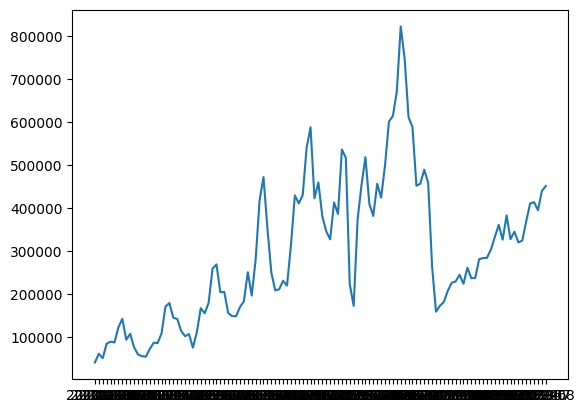

In [153]:
# 시계열 그래프 그리기
plt.plot(df_filter['기준년월'], df_filter['관광'])
# 첫 번째 값: 그래프의 X축, 두 번째 값: Y축에 지정할 칼럼.

plt.show()

**plt.show 그래프에서 한글 작성**

In [154]:
# plt.show 그래프에서 한글 작성
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [155]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [156]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.7.1
설치 위치:  /usr/local/lib/python3.10/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib


In [157]:
import matplotlib.pyplot as plt

# size, family
print('# 설정 되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] )
print('# 설정 되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정 되어있는 폰트 사이즈
10.0
# 설정 되어있는 폰트 글꼴
['NanumBarunGothic']


In [158]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [159]:
import matplotlib.font_manager
fonts=matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
for font in fonts:
  print('font값:',font)

font값: /usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf
font값: /usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
font값: /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
font값: /usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf
font값: /usr/share/fonts/truetype/nanum/NanumGothic.ttf
font값: /usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf
font값: /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
font값: /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
font값: /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
font값: /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
font값: /usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf
font값: /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
font값: /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
font값: /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
font값: /usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf
font값: /usr/share/fonts/truetype/liberati

In [160]:
from matplotlib.font_manager import FontProperties

import numpy as nnp
import pandas as pd
import matplotlib.pyplot as plt

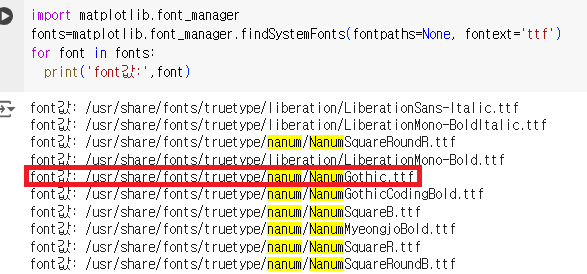

([<matplotlib.axis.XTick at 0x798097d9cb50>,
 [Text(0.0, 0, '2010-01'),
  Text(12.0, 0, '2011-01'),
  Text(24.0, 0, '2012-01'),
  Text(36.0, 0, '2013-01'),
  Text(48.0, 0, '2014-01'),
  Text(60.0, 0, '2015-01'),
  Text(72.0, 0, '2016-01'),
  Text(84.0, 0, '2017-01'),
  Text(96.0, 0, '2018-01'),
  Text(108.0, 0, '2019-01')])

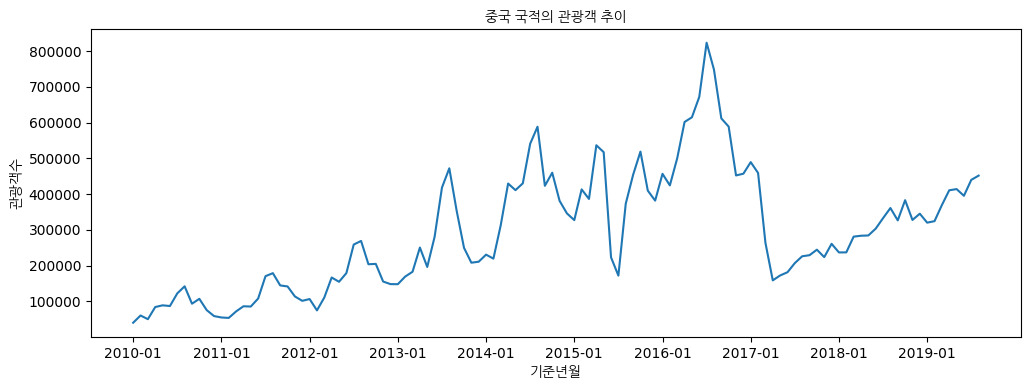

In [161]:
# 그래프 크기 조절
plt.figure(figsize=(12,4))

# 그래프 내용 설정
plt.plot(df_filter['기준년월'],df_filter['관광'])

font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop=FontProperties(fname=font_path)

# 그래프 타이틀, x, y축 이름 달기
plt.title('중국 국적의 관광객 추이',fontproperties=font_prop)
plt.xlabel('기준년월',fontproperties=font_prop)
plt.ylabel('관광객수',fontproperties=font_prop)

# x축 눈금 값 설정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

**외국인 관광객 중 상위 5개 국가(중국, 일본, 대만, 미국, 홍콩)별로 시계열 그래프 그리기**

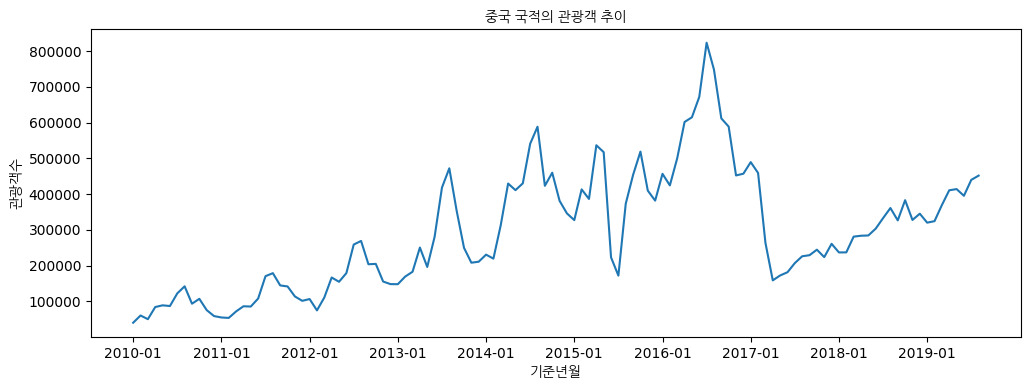

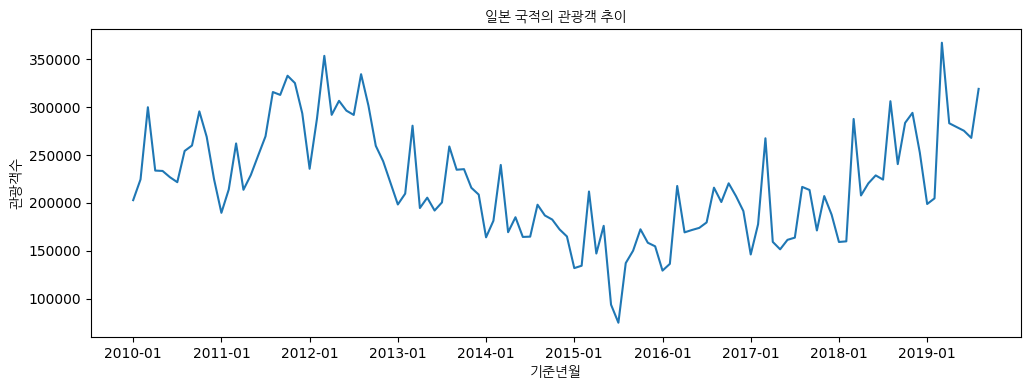

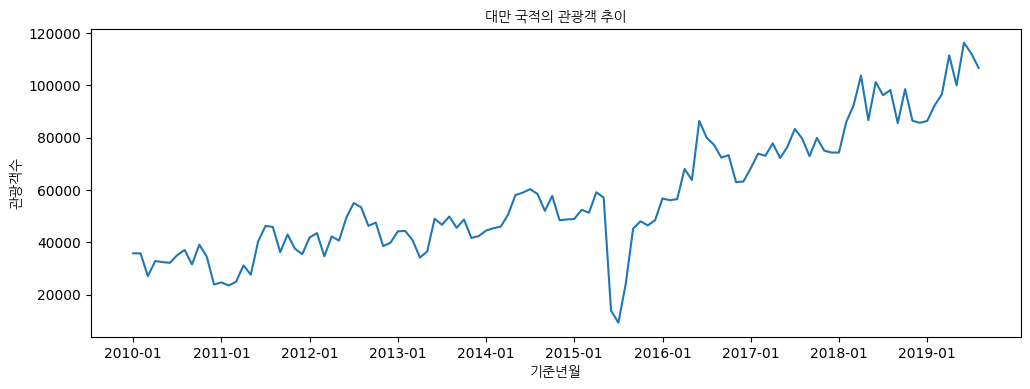

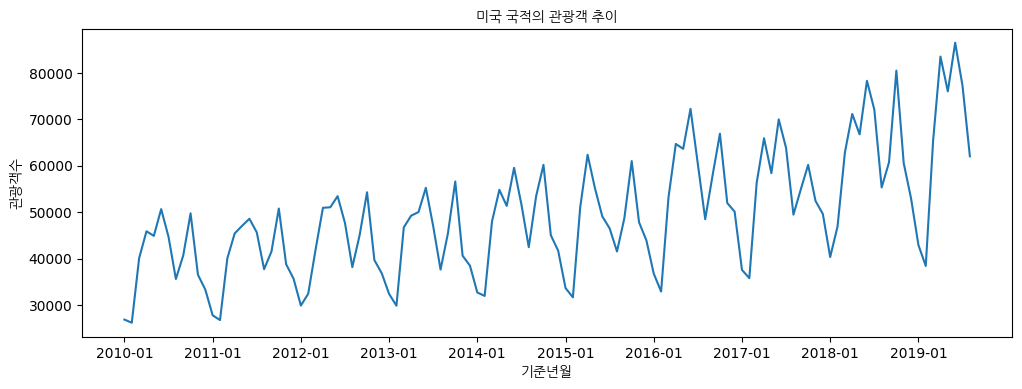

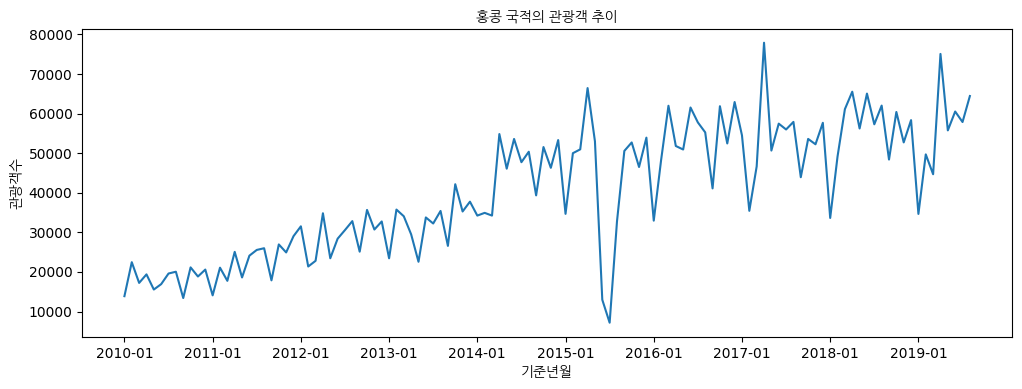

In [162]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국가의 리스트 만들기
cntry_list=['중국','일본','대만','미국','홍콩']

# 반복문으로 여러 그래프 그리기
for cntry in cntry_list:
  # 국적 관광객만 추출
  condition=(df['국적']== cntry)
  df_filter=df[condition]

  # 그래프 그리기
  plt.figure(figsize=(12,4))
  plt.plot(df_filter['기준년월'],df_filter['관광'])

  # 그래프 타이틀, X, Y축 이름 달기
  plt.title('{} 국적의 관광객 추이'.format(cntry),fontproperties=font_prop)
  plt.xlabel('기준년월',fontproperties=font_prop)
  plt.ylabel('관광객수',fontproperties=font_prop)

  # x축 눈금 값 결정
  plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

  # 그래프 출력
  plt.show()

**그래프 합쳐서 그리기**

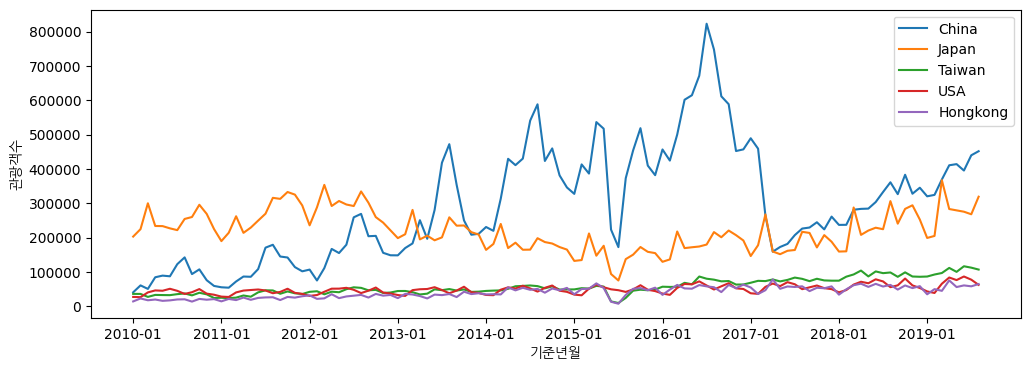

In [163]:
# 우리나라를 방문하는 외국인 관광객 중 상위 5개 국가의 리스트 만들기
cntry_list=['중국','일본','대만','미국','홍콩']

# 국적 관광객만 추출
condition=(df['국적']== '중국')
df_filter=df[condition]

condition=(df['국적']== '일본')
df_filter1=df[condition]

condition=(df['국적']== '대만')
df_filter2=df[condition]

condition=(df['국적']== '미국')
df_filter3=df[condition]

condition=(df['국적']== '홍콩')
df_filter4=df[condition]


# 그래프 그리기
plt.figure(figsize=(12,4))
plt.plot(df_filter['기준년월'],df_filter['관광'],label='China')
plt.plot(df_filter1['기준년월'],df_filter1['관광'],label='Japan')
plt.plot(df_filter2['기준년월'],df_filter2['관광'],label='Taiwan')
plt.plot(df_filter3['기준년월'],df_filter3['관광'],label='USA')
plt.plot(df_filter4['기준년월'],df_filter4['관광'],label='Hongkong')

# 그래프 타이틀, X, Y축 이름 달기
plt.legend()
plt.xlabel('기준년월',fontproperties=font_prop)
plt.ylabel('관광객수',fontproperties=font_prop)

# x축 눈금 값 결정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

# 그래프 출력
plt.show()

**히트맵 그래프 그리기**

In [164]:
# 히트맵 그래프는 매트릭스(matrix) 형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화 방법
# 전체 데이터를 한눈에 파악할 수 있다는 장점이 있습니다.

# 히트맵 그래프를 잘 그리려면 X, Y축, 그래프 내용에 어떤 변수들이 들어갈지 고민해야 합니다.
# X축: 월(month), Y축: 연도(Year)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,75.1,3.3


In [165]:
# str.slice()함수를 이용해 연도, 월 칼럼 만들기
df['년도']=df['기준년월'].str.slice(0,4)
# 기준년월: 2010-01 중에서 str.slice(0,4)를 통해, '2010' 값 출력
# 기준년월의 0, 1, 2, 3번재 글자를 추출하겠다는 의미.

# df['기준년월]: df 데이터 중 기준년월 컬럼을 선택(series 형태)
# str: series 값을 문자 형태로 변경
# slice(0,4): 앞의 문자열 중 0,1,2,3 번째 값을 추출

df['월']=df['기준년월'].str.slice(5,7)
df.head()

# df['년도'], df['월']: 연도와 월에 대한 변수를 만들었으니, 히트맵 그래프를 그리기 위해 매트릭스 형태로 만들어야 합니다.

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,75.1,3.3,2010,01


In [166]:
df['년도']

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6955    2019
6956    2019
6957    2019
6958    2019
6959    2019
Name: 년도, Length: 6960, dtype: object

In [167]:
df['년도'].str

In [168]:
# 중국인 관광객 필터
condition=(df['국적']=='중국')
df_filter=df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,57.8,17.0,2010,05


**pivot_table() 함수 이용**

In [169]:
df_pivot=df_filter.pivot_table(values='관광',index='년도',columns='월')
df_pivot # x축: 월, y축: 년도, 값: 관광객 수

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


**seaborn 라이브러리**

In [170]:
# 히트맵 그래프 그리기에 필요한 라이브러리를 임포트
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


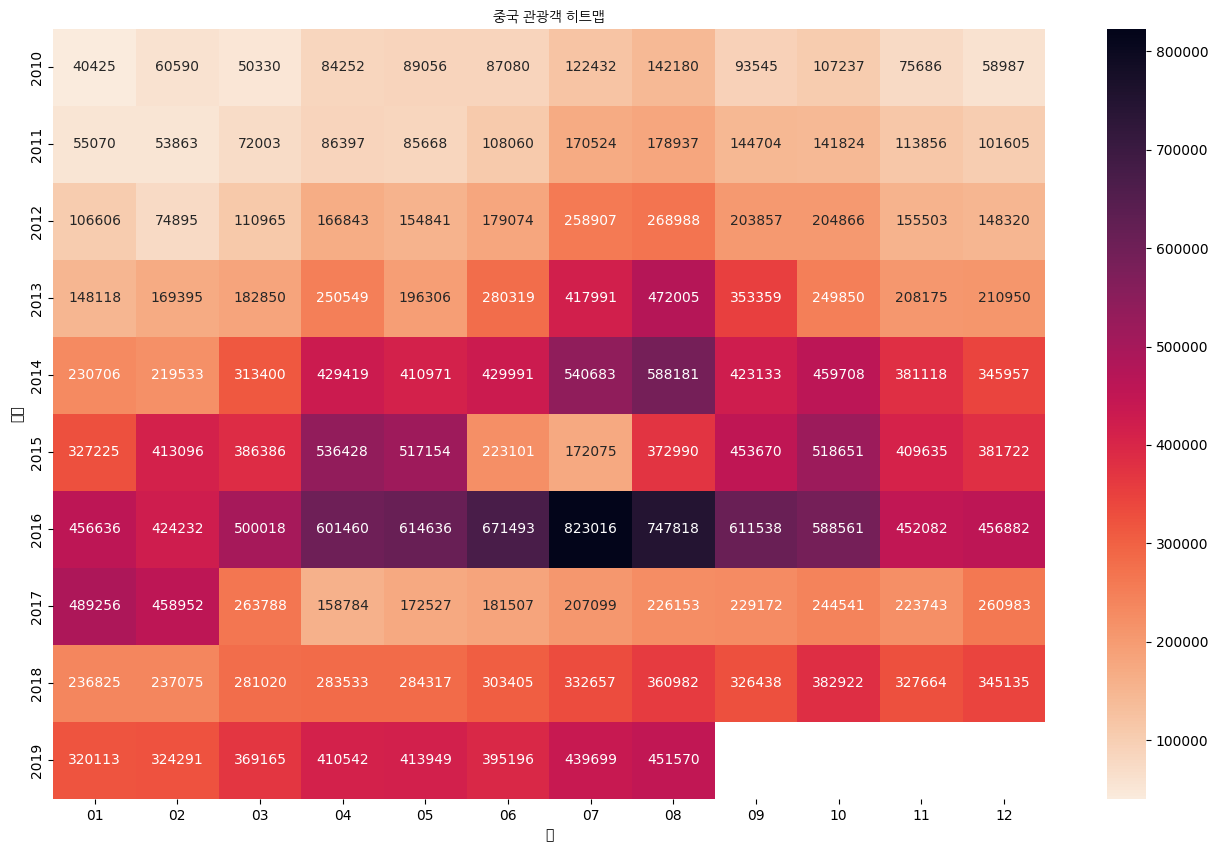

In [171]:
# 히트맵 그래프 그리기
# 그래프 크기 설정
plt.figure(figsize=(16,10))

# 히트맵 그래프 그리기
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
# df_pivot: 히트맵 그래프로 나타낼 데이터 지정
# annot=True: 히트맵 그래프에 각 칸에 실제 값을 표시
# fmt='.0f': 숫자 형태를 소수점이 없는 실수형으로 표현.
# cmap='rocket_r': 그래프의 색깔 조합을 지정.

# 그래프 타이틀 달기
plt.title('중국 관광객 히트맵',fontproperties=font_prop)

# 그래프 표현
plt.show()
# 히트맵 그래프에서 관광객 수가 많을수록 색상이 진하게 표시되기 때문에, 어느 시기에 관광객수가 많은지,
# 적은지 한눈에 알아볼 수 있습니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


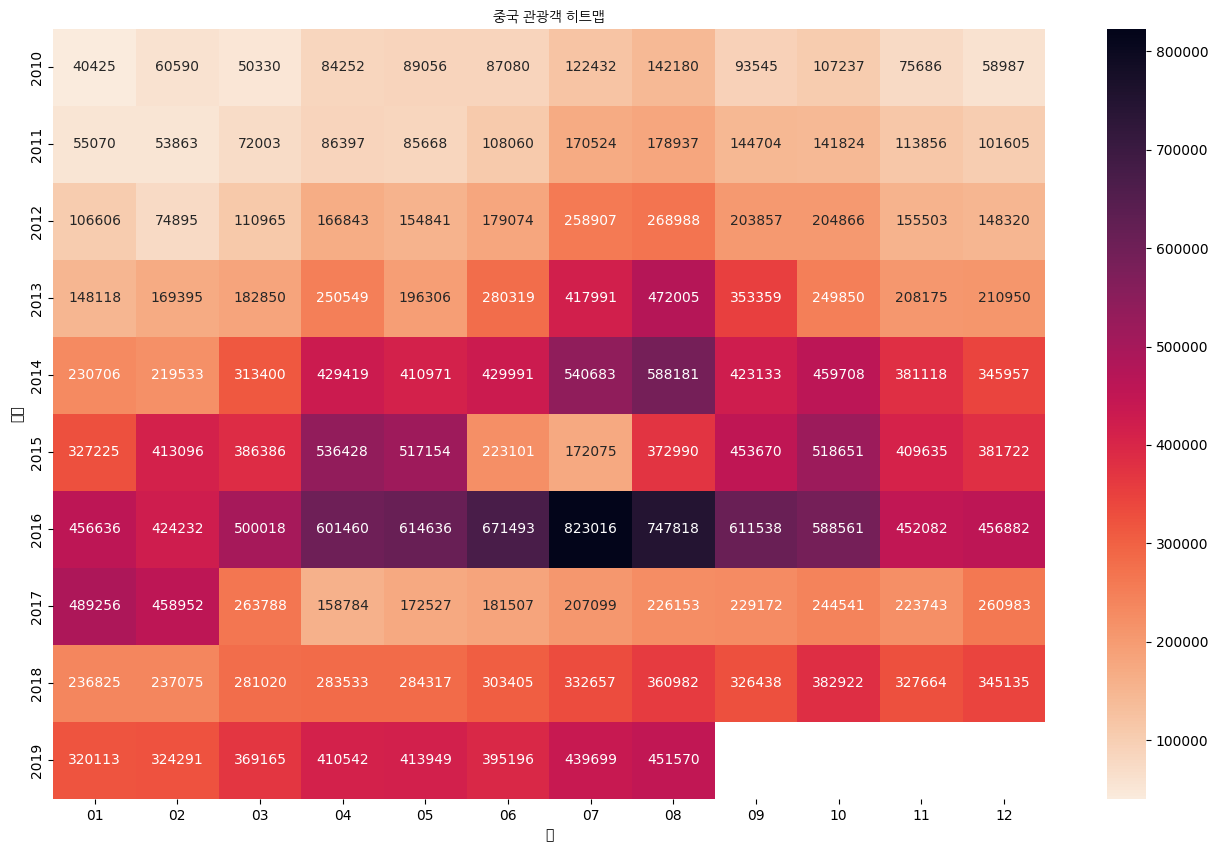

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


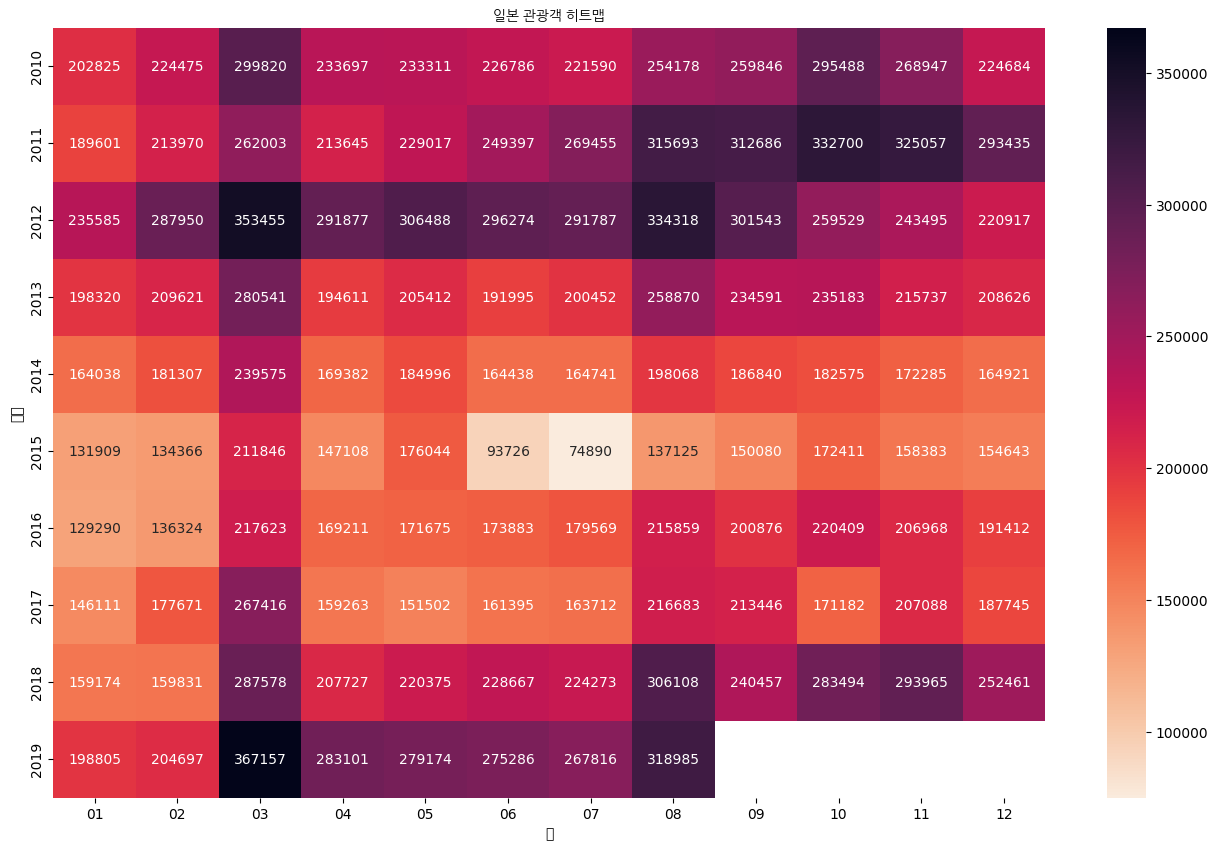

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


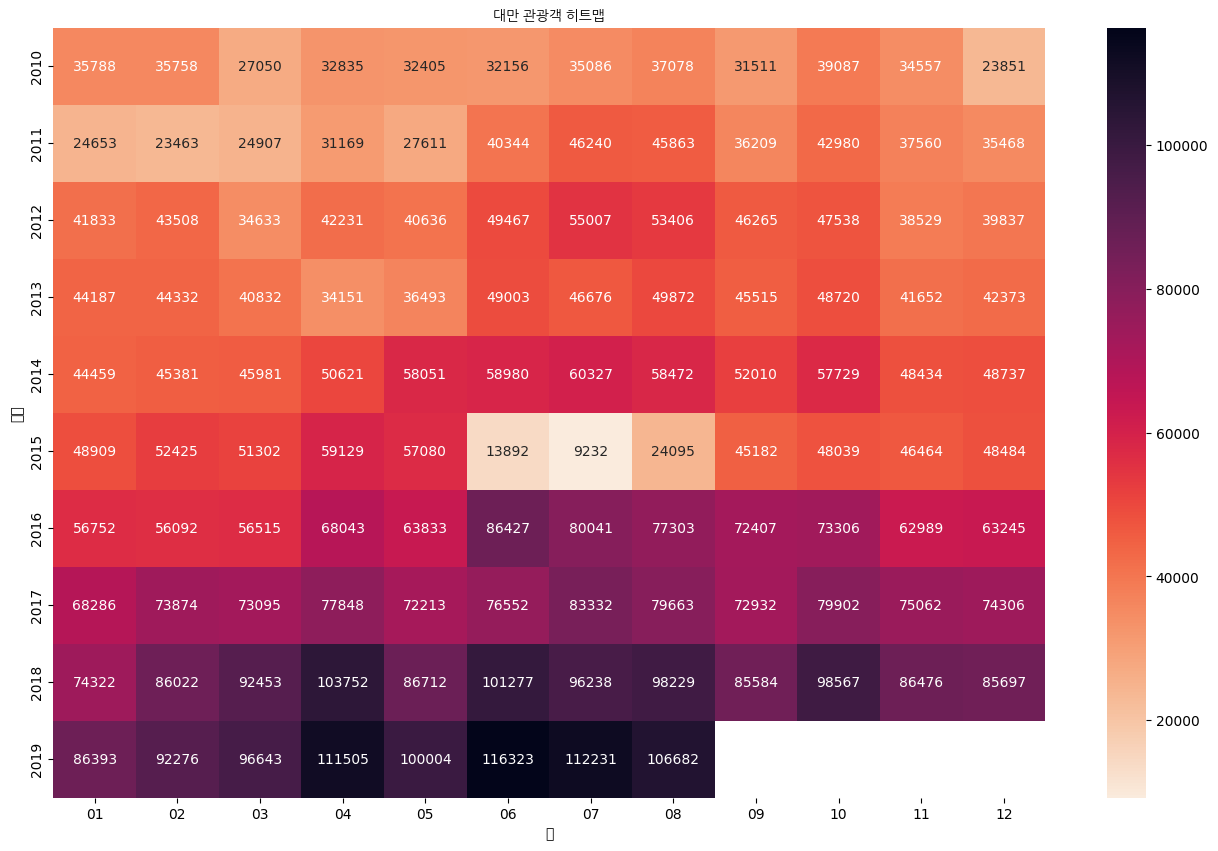

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


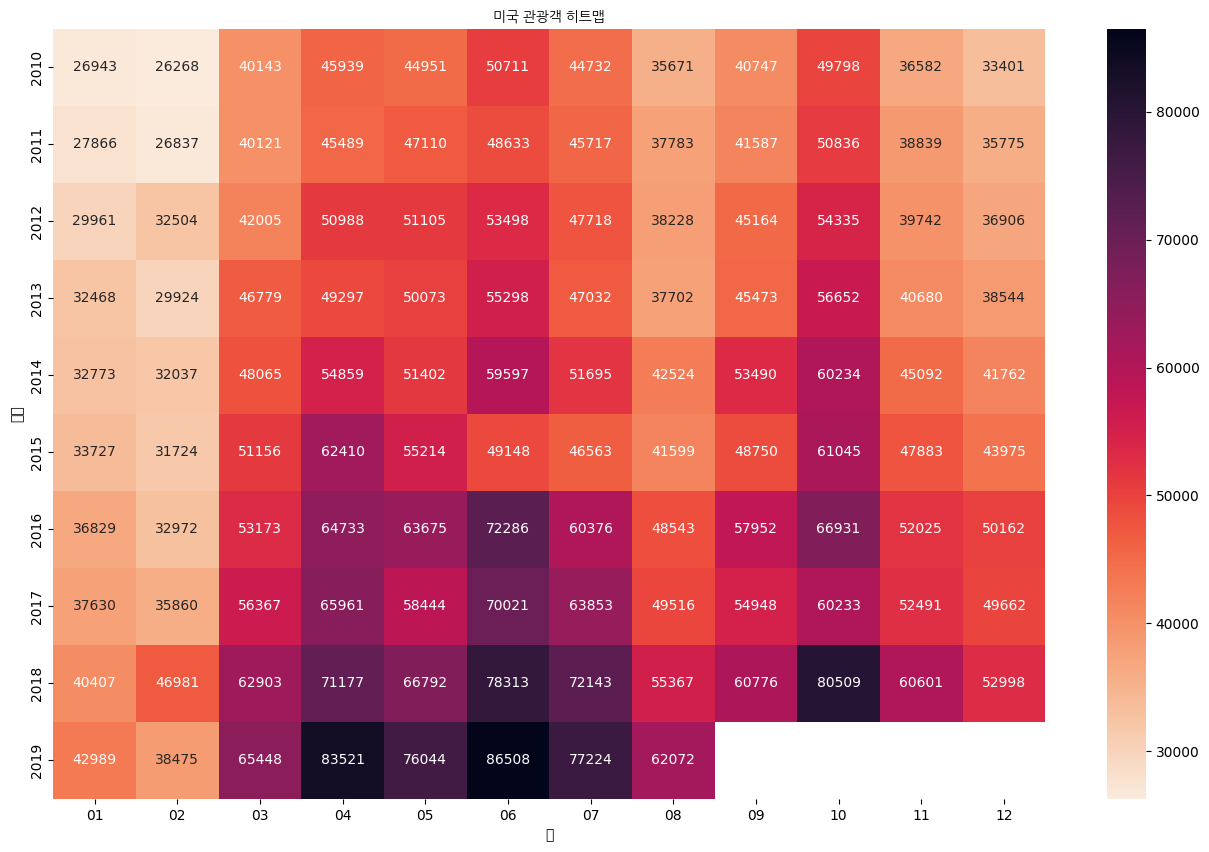

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


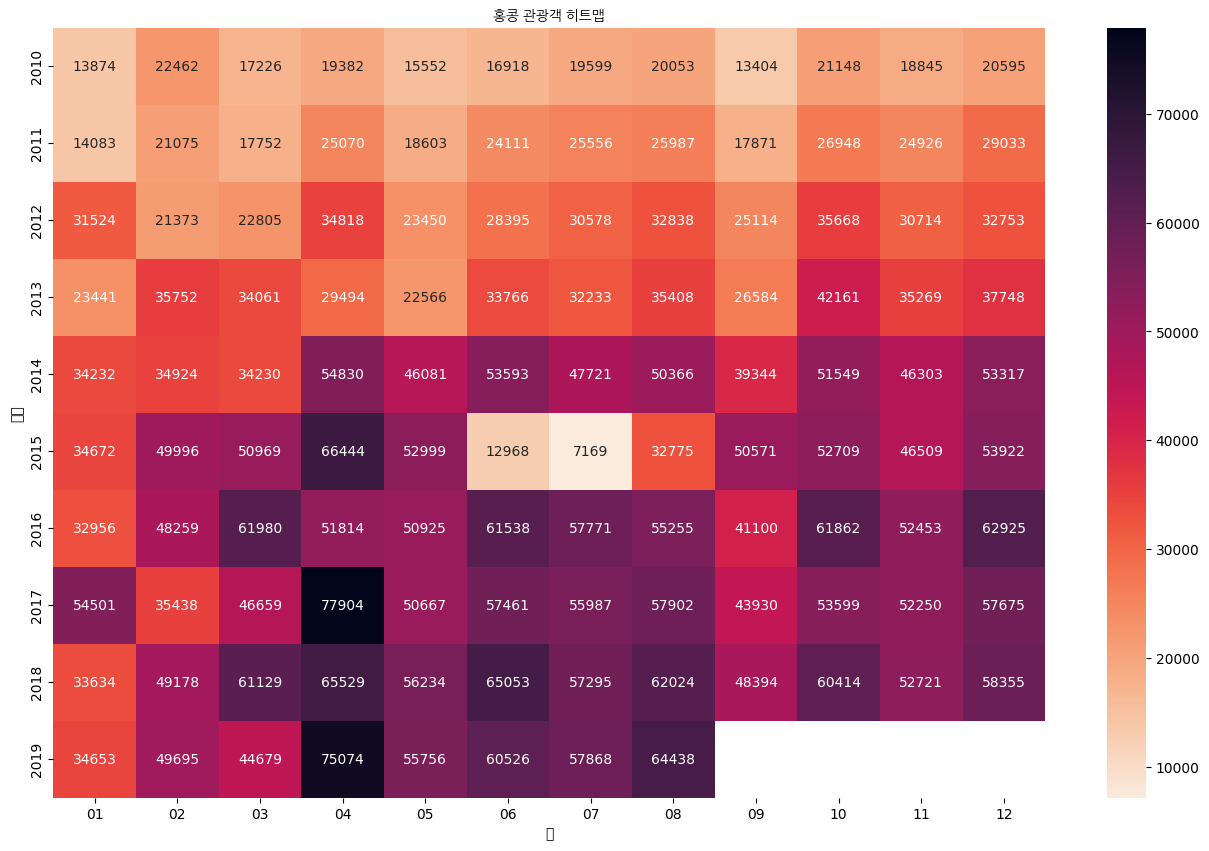

In [172]:
# 반복문으로 상위 5개국에 대한 히트맵 그래프 그리기
for cntry in cntry_list:
  condition=(df['국적']==cntry)
  df_filter=df[condition]

  df_pivot=df_filter.pivot_table(values='관광',index='년도',columns='월')

  # 그래프 크기 설정
  plt.figure(figsize=(16,10))

  # 히트맵 그래프 그리기
  sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')

  # 그래프 타이틀 달기
  plt.title('{} 관광객 히트맵'.format(cntry),fontproperties=font_prop)

  # 그래프 표현
  plt.show()